## Function for Plotting

Requires: 'PTResults-1000.xlsx', 'abscissa.txt' and a folder named 'Plots'

In [19]:
# Import required packages
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from IPython.display import display, Math #

from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

##################################

#CLASSIFIER

##################################

## READING DATA ##

# Setup pandas options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.5f}'.format

# Get the data
PT_data_1000 = pd.read_excel("PTResults-1000.xlsx")
abscissa = np.loadtxt("abscissa.txt")

##################################

## SETTING UP VARIABLES ##
ncells = len(abscissa) # Number of abscissa's points

#PRECISION

prec_mean_3 = []
prec_mean_6 = []
prec_mean_9 = []

#RECALL

rec_mean_3 = []
rec_mean_6 = []
rec_mean_9 = []

##################################

## TRAINING THE DECISION TREES ##

for i in range(ncells):

    if i % 10 == 0 : print('cell number: '+str(i)'/'+str(ncells))

    target = PT_data_1000.iloc[:,5+i]  # PT_data_1000.iloc[:,5:181]
    X = PT_data_1000.iloc[:,0:5]  # PT_data_1000.drop(target, axis=1)  # Remove all columns that are target
    y = target

    # Making predictions on the testing features set with precision metric

    precision_3 = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=10), X, y,
                                  scoring = 'precision', cv=10)
    precision_6 = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=10), X, y,
                                  scoring = 'precision', cv=10)
    precision_9 = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=10), X, y,
                                  scoring = 'precision', cv=10)

    # Making predictions on the testing features set with recall metric
    recall_3 = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=10), X, y,
                                  scoring = 'recall', cv=10)
    recall_6 = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=10), X, y,
                                  scoring = 'recall', cv=10)
    recall_9 = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=10), X, y,
                                  scoring = 'recall', cv=10)


    # Mean and std
    prec_mean_3.append(precision_3.mean())
    prec_mean_6.append(precision_6.mean())
    prec_mean_9.append(precision_9.mean())

    prec_std_3.append(precision_3.std())
    prec_std_6.append(precision_6.std())
    prec_std_9.append(precision_9.std())

    rec_mean_3.append(recall_3.mean())
    rec_mean_6.append(recall_6.mean())
    rec_mean_9.append(recall_9.mean())

    rec_std_3.append(recall_3.std())
    rec_std_6.append(recall_6.std())
    rec_std_9.append(recall_9.std())

    error_integral_prec_3 += precision_3.mean()
    error_integral_rec_3 += recall_3.mean()

    error_integral_prec += precision_9.mean()
    error_integral_rec += recall_9.mean()

prec_error_3 = np.array(prec_mean_3) * 100 # %
prec_error_6 = np.array(prec_mean_6) * 100 # %
prec_error_9 = np.array(prec_mean_9) * 100 # %

rec_error_3 = np.array(rec_mean_3) * 100 # %
rec_error_6 = np.array(rec_mean_6) * 100 # %
rec_error_9 = np.array(rec_mean_9) * 100 # %

print('precision 3 =', error_integral_prec_3, 'recall 3', error_integral_rec_3)
print('precision 9 =', error_integral_prec, 'recall 9', error_integral_rec)

176
cell number :0
cell number :10
cell number :20
cell number :30
cell number :40


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


cell number :50
cell number :60
cell number :70


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number 

cell number :80
cell number :90


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number 

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number 

cell number :100


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number 

cell number :110
cell number :120
cell number :130
cell number :140
cell number :150
cell number :160


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarnin

cell number :170


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarnin

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


precision 3 = 357.017886184 recall 3 350.15336083
precision 9 = 351.490809671 recall 9 345.45732995


In [20]:
def my_plot(errors, curves_labels, metric, algthm_type, extra_labels=None):
    # errors: a list of numpy arrays with percentages in [0,100]
    # curves_labels: a list of strings with the labels for each curve in a single plot
    # yaxis: either prediction of recall. Raise exception otherwise
    
    # a couple exception to make make it work properly
    if metric == 'precision' or metric == 'recall':
        if metric == 'precision':
            yaxis_label = r'\textbf{Precision} [\%]'
        if metric == 'recall':
            yaxis_label = r'\textbf{Recall} [\%]'
    else:
        raise Exception('metric must be either precision or recall')
        
    if len(errors) != len(curves_labels):
        raise Exception('Number of labels do not coinside the number of curves')
        
    
        
    
    # curvilinear abscissa
    abscissa = np.loadtxt("abscissa.txt")
    
    # plotting settings
    plt.rc('font',**{'family':'serif','serif':['Palatino']})
    plt.rc('text', usetex=True)

    
    # get percentage of 1s at each location
    Data_Cell = pd.read_excel("PTResults-1000.xlsx")
    meanWater = np.zeros(len(abscissa))
    for h in range(len(abscissa)):
        location = Data_Cell.iloc[:,h+5]
        meanWater[h] = np.sum(location.values)/1000 * 100 # multiply pdf by 100
                                                          #    to get percentage

    plt.fill_between(abscissa, meanWater, color='lightgray')
    
    
    # plot metric curves
    for (error, curve, i_color) in zip(errors, curves_labels, range(len(errors))):
        plt.plot(abscissa, error, color='C'+str(i_color),label=curve)
    
        
    # axis label settings
    plt.xlabel(r'\textbf{Abscissa}',fontsize=12)
    plt.ylabel(yaxis_label,fontsize=16)
    plt.ylim(-0.5,105)
    plt.legend()
    
    
    # saving fig
    if extra_labels==None:
        plt.savefig('Plots/'+str(algthm_type)+'_'+str(metric)+'.eps')
    else:
        plt.savefig('Plots/'+str(algthm_type)+'_'+str(metric)+'_'+str(extra_labels)+'.eps')
    
    # clear figure
    plt.show()
    plt.clf()
    
    
    

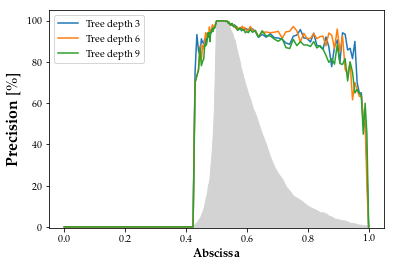

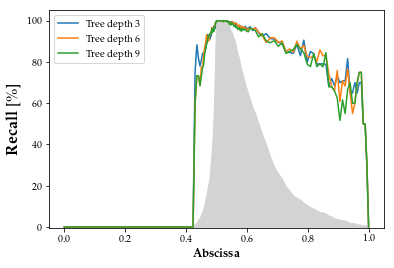

In [21]:
# This requires creating a directory with the name 'Plots'


curves_labels = ['Tree depth 3', 'Tree depth 6', 'Tree depth 9']
algthm_type = 'DT_Boosting'
# extra_labels = 'test' (optional)

#plot 1
prec_errors = [prec_error_3, prec_error_6, prec_error_9]
metric = 'precision'
my_plot(prec_errors, curves_labels, metric, algthm_type)

#plot 2
rec_errors = [rec_error_3, rec_error_6, rec_error_9]
metric = 'recall'
my_plot(rec_errors, curves_labels, metric, algthm_type)